In [11]:
import gym
from agent import DDPG, OrnsteinUhlenbeckActionNoise
import torch
import variable as v
from train_session import TrainSession
from copy import deepcopy
import numpy as np
import utils

In [30]:
env = gym.make("MountainCarContinuous-v0")
train_session = None

In [31]:
env.reset()

action_high = env.action_space.high[0]
action_low = env.action_space.low[0]
action_shape = env.action_space.shape[0]

state_shape = env.observation_space.shape[0]

seed = 6

In [32]:
noise_init = {'mu': 0.0, 'sigma': 0.2, 'action_dim': action_shape}

replay_buffer_init = {'max_len': 100000, 'batch_size': 128}

actor_init = {'action_high': action_high, 
              'action_low': action_low, 
              'network_init': {'i_shape': state_shape, 
                               'l1_shape': 400, 
                               'l2_shape': 300,
                               'o_shape': action_shape
                              },
              'optimizer': {'lr': 1e-2}
             }

critic_init = {'network_init': {'i_shape': state_shape, 
                               'l1_shape': 400, 
                               'l2_shape': 300,
                               'action_shape': action_shape
                              },
              'optimizer': {'lr': 1e-2}
             }


ddpg_init = {
    'seed': seed,
    'action_shape': action_shape,
    'discount_factor': .99,
    'update_target_rate': .95,
    'update_after': 1000,
    'update_every': 50,
    'noise_type': 'ou',
    'noise': noise_init,
    'replay_buffer': replay_buffer_init,
    'actor': actor_init,
    'critic': critic_init
}

In [33]:
if not train_session:
    print('Train Session reset')
    train_session = TrainSession({}, env, seed)

Train Session reset


In [36]:
if False:
    agents_created = {
        'ddpg_agent': DDPG(ddpg_init)
    }
    agent_names = train_session.append_agents(agents_created)
else:
    d = {('noise_type', ): ['ou', 'gaussian']}
    agent_names = train_session.parameter_grid_append(DDPG, ddpg_init, d)
    

In [37]:
all_agent_names = train_session.agents.keys()
s = '\n- '.join(all_agent_names)
print(f"All Agents: \n- {s}")

All Agents: 
- DDPG: noise_type:ou;
- DDPG: noise_type:gaussian;


In [42]:
n_episode = 1000
t_max_per_episode = 300
graphical = False

In [43]:
train_session.train(n_episode=n_episode, t_max_per_episode=t_max_per_episode,
                    graphical=graphical, agent_subset=agent_names)

100%|██████████| 1000/1000 [03:30<00:00,  4.75it/s]


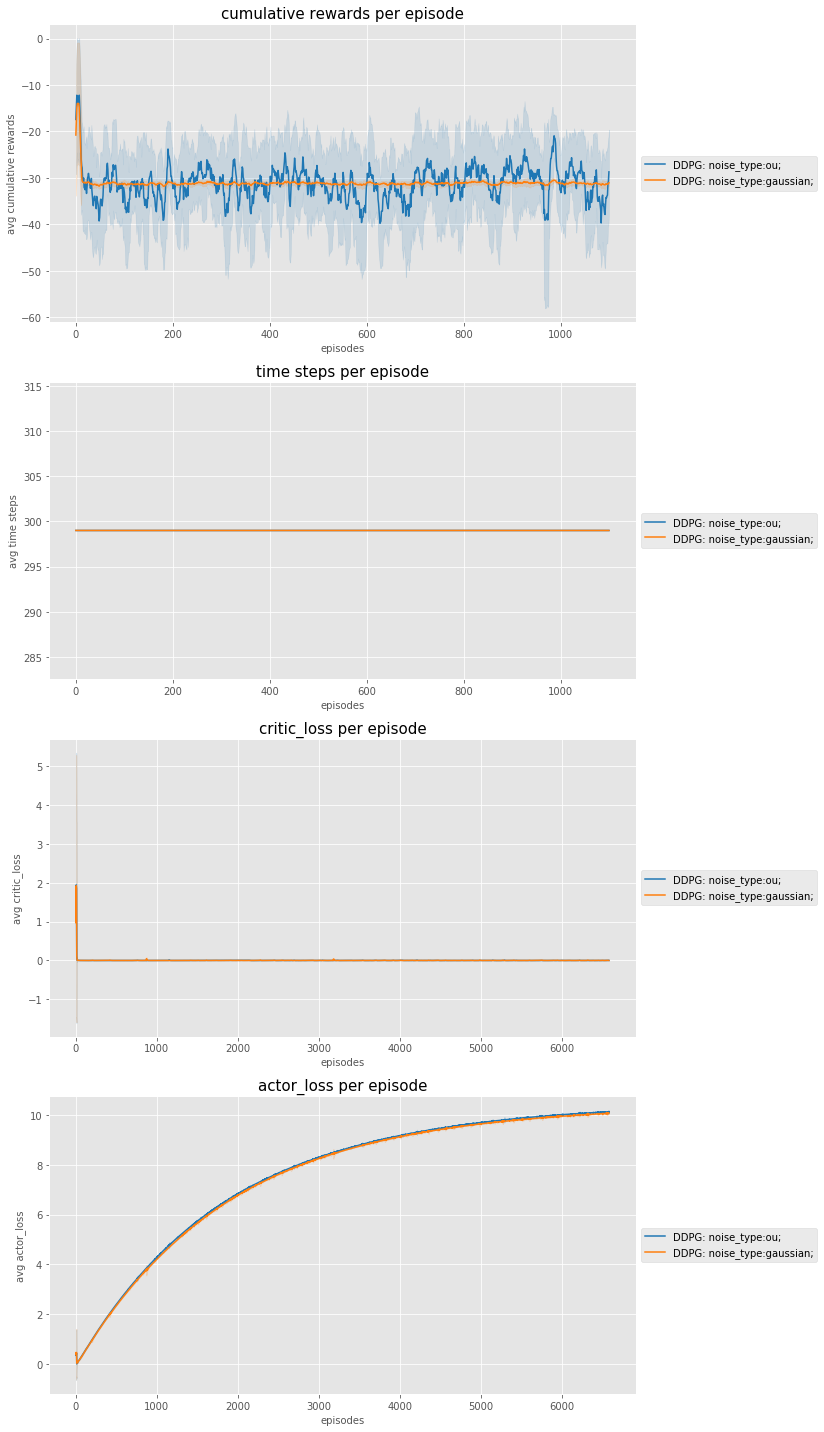

In [45]:
train_session.plot_train(window=10, agent_subset=agent_names)

100%|██████████| 3/3 [00:15<00:00,  5.00s/it]


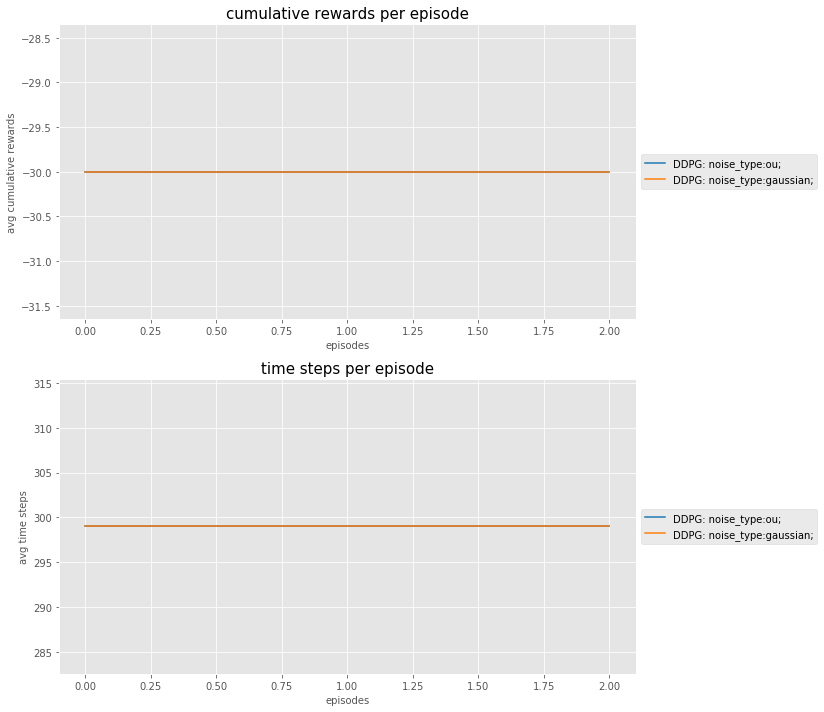

In [46]:
train_session.test(n_episode=3, t_max_per_episode=t_max_per_episode, 
                   graphical=True, agent_subset=None, plot=True,
                   window=1, save_video=False)

In [52]:
len(train_session.agents["DDPG: actor_optimizer_lr:0.1;"].actor.optimizer)

TypeError: object of type 'Adam' has no len()

In [50]:
env.action_space.bounded_below

array([ True])